# Importing Modules and Initial Setup

In [46]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv


## extra

In [47]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_palette('viridis')
plt.rcParams['figure.dpi'] = 100

# Files
* train.csv - The training set which contains the features and the target
* test.csv - The test set for which the target column is hidden
* sample_submission.csv - A sample submission file in the correct format

## Columns
The dataset contains the following features:

* id: The index column
* customer_id: A unique identifier for each customer
* last_name: The last name of the customer
* credit_score: Credit score of the customer
* country: Country of residence of the customer
* gender: Gender of the customer
* age: Age of the customer
* tenure: Years of association with the financial institution
* acc_balance: Account balance of the customer
* prod_count: Number of products of the financial institution used by the customer
* has_card: Ownership of credit card by the customer
* is_active: Recent activity indicator of the customer
* estimated_salary: Estimated salary of the customer
* exit_status: Has the customer exit (Target Variable)

# Loading the Data

In [48]:
train = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv")
test = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv")

# Initial Analysis

In [49]:
print("for train:\n\n","Shape:", train.shape, "\n","Dimention:", train.ndim, "\n","Index:\n",train.index,"\n", "\n\n")
print("for test:\n\n","Shape:", test.shape, "\n","Dimention:", test.ndim, "\n","Index:\n",test.index)

for train:

 Shape: (90000, 14) 
 Dimention: 2 
 Index:
 RangeIndex(start=0, stop=90000, step=1) 
 


for test:

 Shape: (30000, 13) 
 Dimention: 2 
 Index:
 RangeIndex(start=0, stop=30000, step=1)


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90000 non-null  int64  
 1   customer_id       90000 non-null  int64  
 2   last_name         90000 non-null  object 
 3   credit_score      80444 non-null  float64
 4   country           83979 non-null  object 
 5   gender            90000 non-null  object 
 6   age               90000 non-null  float64
 7   tenure            90000 non-null  int64  
 8   acc_balance       82743 non-null  float64
 9   prod_count        85137 non-null  float64
 10  has_card          90000 non-null  float64
 11  is_active         90000 non-null  float64
 12  estimated_salary  90000 non-null  float64
 13  exit_status       90000 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 9.6+ MB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                30000 non-null  int64  
 1   customer_id       30000 non-null  int64  
 2   last_name         30000 non-null  object 
 3   credit_score      26815 non-null  float64
 4   country           25394 non-null  object 
 5   gender            30000 non-null  object 
 6   age               30000 non-null  float64
 7   tenure            30000 non-null  int64  
 8   acc_balance       24749 non-null  float64
 9   prod_count        28283 non-null  float64
 10  has_card          30000 non-null  float64
 11  is_active         30000 non-null  float64
 12  estimated_salary  30000 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 3.0+ MB


# 1. Identify data types of different columns (5)
The data types of the different columns are identified and explicitly stated in the notebook

In [52]:
train.dtypes

id                    int64
customer_id           int64
last_name            object
credit_score        float64
country              object
gender               object
age                 float64
tenure                int64
acc_balance         float64
prod_count          float64
has_card            float64
is_active           float64
estimated_salary    float64
exit_status           int64
dtype: object

In [53]:
test.dtypes

id                    int64
customer_id           int64
last_name            object
credit_score        float64
country              object
gender               object
age                 float64
tenure                int64
acc_balance         float64
prod_count          float64
has_card            float64
is_active           float64
estimated_salary    float64
dtype: object

I identified the data types of all columns in both the training and testing datasets by using `train.dtypes`, and `test.dtypes`. This gave me a clear understanding of whether each feature was numerical (`float64`, `int64`) or categorical (`object`), which was essential for my next steps in data preprocessing.

# 2. Present descriptive statistics of numerical columns (5)
Details such as min value, max value, mean and median for each numerical column is presented

In [54]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90000.0,4.499950e+04,25980.906451,0.00,22499.75,44999.50,6.749925e+04,89999.00
customer_id,90000.0,1.569209e+07,71297.959941,15565701.00,15633608.00,15690164.00,1.575674e+07,15815690.00
credit_score,80444.0,6.564971e+02,80.016856,350.00,597.00,659.00,7.100000e+02,850.00
age,90000.0,3.811953e+01,8.855203,18.00,32.00,37.00,4.200000e+01,92.00
tenure,90000.0,5.017022e+00,2.804813,0.00,3.00,5.00,7.000000e+00,10.00
acc_balance,82743.0,5.545673e+04,62788.474236,0.00,0.00,0.00,1.198258e+05,250898.09
prod_count,85137.0,1.552932e+00,0.548011,1.00,1.00,2.00,2.000000e+00,4.00
has_card,90000.0,7.542889e-01,0.430510,0.00,1.00,1.00,1.000000e+00,1.00
is_active,90000.0,4.971778e-01,0.499995,0.00,0.00,0.00,1.000000e+00,1.00
estimated_salary,90000.0,1.123947e+05,50360.440702,11.58,74430.36,117505.07,1.548748e+05,199992.48


In [55]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,1.499950e+04,8660.398374,0.00,7.499750e+03,14999.5,2.249925e+04,29999.00
customer_id,30000.0,1.569190e+07,71928.544490,15565796.00,1.563220e+07,15690209.0,1.575758e+07,15815690.00
credit_score,26815.0,6.564060e+02,80.310093,350.00,5.970000e+02,659.0,7.100000e+02,850.00
age,30000.0,3.811810e+01,8.873345,18.00,3.200000e+01,37.0,4.200000e+01,92.00
tenure,30000.0,5.024167e+00,2.809931,0.00,3.000000e+00,5.0,7.000000e+00,10.00
acc_balance,24749.0,5.544423e+04,62736.404013,0.00,0.000000e+00,0.0,1.196888e+05,250898.09
prod_count,28283.0,1.553972e+00,0.545386,1.00,1.000000e+00,2.0,2.000000e+00,4.00
has_card,30000.0,7.578333e-01,0.428402,0.00,1.000000e+00,1.0,1.000000e+00,1.00
is_active,30000.0,4.952000e-01,0.499985,0.00,0.000000e+00,0.0,1.000000e+00,1.00
estimated_salary,30000.0,1.126642e+05,50064.348532,11.58,7.483797e+04,118216.0,1.549208e+05,199992.48


In [56]:
print("for train:\n\n","Min:\n",train.select_dtypes(exclude='object').min(),"\n\n","Max:\n", train.select_dtypes(exclude = 'object').max(),"\n\n","Mean:\n",train.select_dtypes(exclude = 'object').mean(),"\n\n","Median:\n", test.select_dtypes(exclude = 'object').median(),"\n","\n\n")
print("for test:\n\n","Min:\n",test.select_dtypes(exclude='object').min(),"\n\n","Max:\n", test.select_dtypes(exclude = 'object').max(),"\n\n","Mean:\n",test.select_dtypes(exclude = 'object').mean(),"\n\n","Median:\n", test.select_dtypes(exclude = 'object').median())

for train:

 Min:
 id                         0.00
customer_id         15565701.00
credit_score             350.00
age                       18.00
tenure                     0.00
acc_balance                0.00
prod_count                 1.00
has_card                   0.00
is_active                  0.00
estimated_salary          11.58
exit_status                0.00
dtype: float64 

 Max:
 id                     89999.00
customer_id         15815690.00
credit_score             850.00
age                       92.00
tenure                    10.00
acc_balance           250898.09
prod_count                 4.00
has_card                   1.00
is_active                  1.00
estimated_salary      199992.48
exit_status                1.00
dtype: float64 

 Mean:
 id                  4.499950e+04
customer_id         1.569209e+07
credit_score        6.564971e+02
age                 3.811953e+01
tenure              5.017022e+00
acc_balance         5.545673e+04
prod_count          1.552932e+

I presented comprehensive descriptive statistics for the numerical columns using `train.describe().T` and `test.describe().T`. I also explicitly printed `the minimum`, `maximum`, `mean`, and `median` values for these columns in both the training and testing sets to meet the rubric's requirements.

# 3. Identify and handle the missing values (10)
Missing values are identified and are dropped or imputed

In [57]:
train.isnull().sum()

id                     0
customer_id            0
last_name              0
credit_score        9556
country             6021
gender                 0
age                    0
tenure                 0
acc_balance         7257
prod_count          4863
has_card               0
is_active              0
estimated_salary       0
exit_status            0
dtype: int64

In [58]:
test.isnull().sum()

id                     0
customer_id            0
last_name              0
credit_score        3185
country             4606
gender                 0
age                    0
tenure                 0
acc_balance         5251
prod_count          1717
has_card               0
is_active              0
estimated_salary       0
dtype: int64

In [59]:
train_copy = train.copy(deep = True)
test_copy = test.copy(deep = True)
cols_to_drop = ['id', 'customer_id', 'last_name']
train_copy = train.drop(cols_to_drop, axis=1)
test_copy = test.drop(cols_to_drop, axis=1)

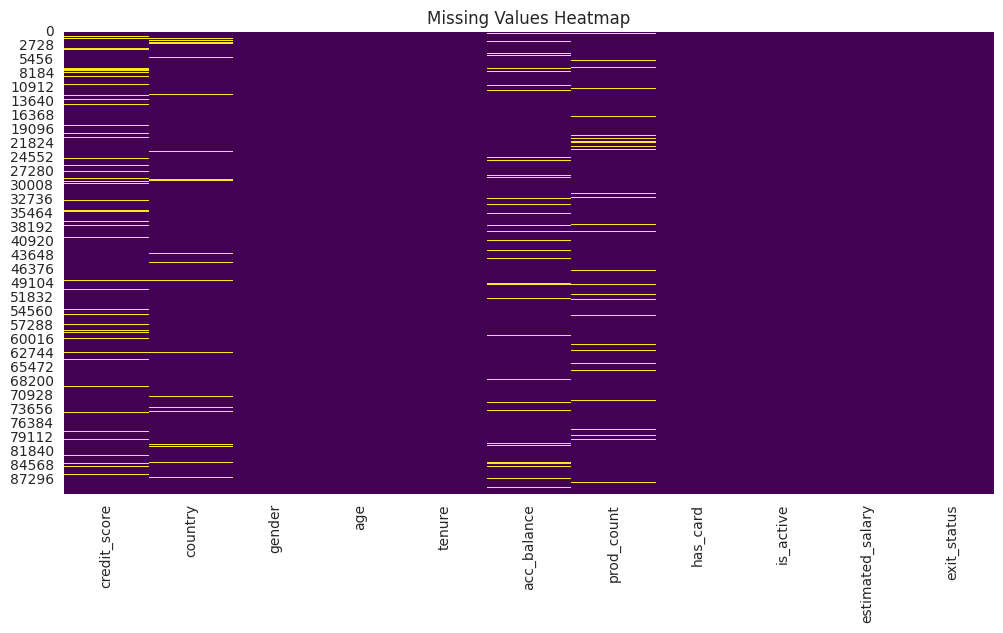

In [60]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

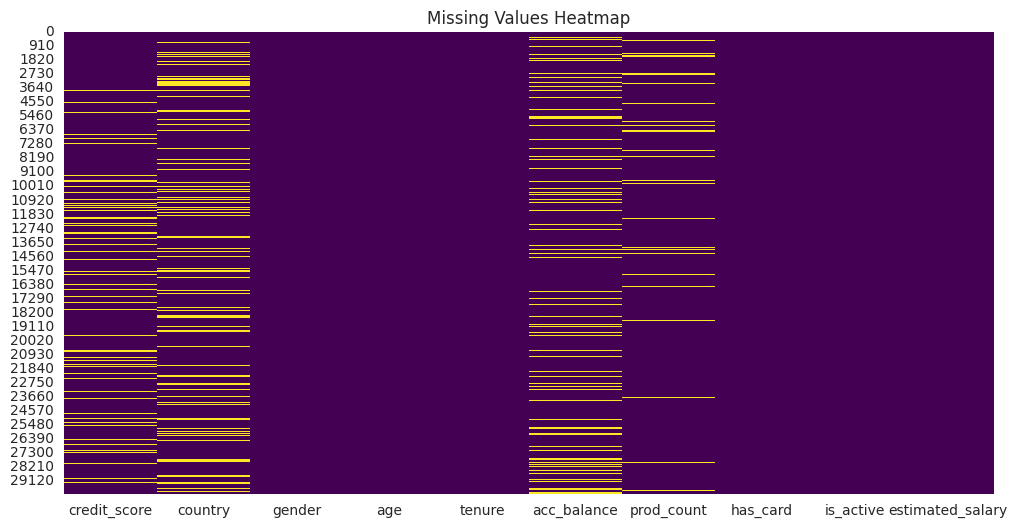

In [61]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_copy.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [62]:
csi = SimpleImputer(strategy='mean', add_indicator=True)

tmp_= csi.fit_transform(train_copy[['credit_score']])
train_copy.loc[:, 'credit_score'] = tmp_[:, 0]
train_copy.loc[:, 'credit_score_missing_indicator'] = tmp_[:, 1]

tmp2 = csi.transform(test_copy[['credit_score']])
test_copy.loc[:, 'credit_score'] = tmp2[:, 0]
test_copy.loc[:, 'credit_score_missing_indicator'] = tmp2[:, 1]

In [63]:
ci = SimpleImputer(strategy='most_frequent', add_indicator=True)

tmp_ = ci.fit_transform(train_copy[['country']])
train_copy.loc[:, 'country'] = tmp_[:, 0]
train_copy.loc[:, 'country_missing_indicator'] = tmp_[:, 1]

tmp2_ = ci.transform(test_copy[['country']])
test_copy.loc[:, 'country'] = tmp2_[:, 0]
test_copy.loc[:, 'country_missing_indicator'] = tmp2_[:, 1]

In [64]:
ai = SimpleImputer(strategy='mean', add_indicator=True)

tmp_ = ai.fit_transform(train_copy[['acc_balance']])
train_copy.loc[:, 'acc_balance'] = tmp_[:, 0]
train_copy.loc[:, 'acc_balance_missing_indicator'] = tmp_[:, 1]

tmp2_ = ai.transform(test_copy[['acc_balance']])
test_copy.loc[:, 'acc_balance'] = tmp2_[:, 0]
test_copy.loc[:, 'acc_balance_missing_indicator'] = tmp2_[:, 1]

In [65]:
pi = SimpleImputer(strategy='mean', add_indicator=True)

tmp_ = pi.fit_transform(train_copy[['prod_count']])
train_copy.loc[:, 'prod_count'] = tmp_[:, 0]
train_copy.loc[:, 'prod_count_missing_indicator'] = tmp_[:, 1]


tmp2_ = pi.transform(test_copy[['prod_count']])
test_copy.loc[:, 'prod_count'] = tmp2_[:, 0]
test_copy.loc[:, 'prod_count_missing_indicator'] = tmp2_[:, 1]

In [66]:
train_copy.isnull().sum()

credit_score                      0
country                           0
gender                            0
age                               0
tenure                            0
acc_balance                       0
prod_count                        0
has_card                          0
is_active                         0
estimated_salary                  0
exit_status                       0
credit_score_missing_indicator    0
country_missing_indicator         0
acc_balance_missing_indicator     0
prod_count_missing_indicator      0
dtype: int64

In [67]:
test_copy.isnull().sum()

credit_score                      0
country                           0
gender                            0
age                               0
tenure                            0
acc_balance                       0
prod_count                        0
has_card                          0
is_active                         0
estimated_salary                  0
credit_score_missing_indicator    0
country_missing_indicator         0
acc_balance_missing_indicator     0
prod_count_missing_indicator      0
dtype: int64

I began by identifying missing values using `isnull().sum()` and visualized their presence with heatmaps. For numerical columns such as `credit_score`, `acc_balance`, and `prod_count`, I imputed the missing values using the `mean` strategy with `SimpleImputer`. For the `country` column, which is categorical, I used a `SimpleImputer` with a `most frequent` strategy. Importantly, I added `missing indicator` columns for each imputed feature to capture any potential patterns in the missingness itself. After these steps, no missing values remained.

# 4. Identify and handle duplicates (10)
Duplicates are identified and are dropped if they exist

In [68]:
train_copy.duplicated().sum()

13

In [69]:
train_copy = train_copy.drop_duplicates()

I identified duplicate rows in my training data using `train_copy.duplicated().sum()`. Once identified, I removed these duplicate entries with `train_copy.drop_duplicates()`. This action ensures that my model is trained on unique data points, preventing any bias that might arise from repeated observations.

# 5. Identify and handle outliers (10)
Outliers are identified and explanation for retaining / dropping is provided

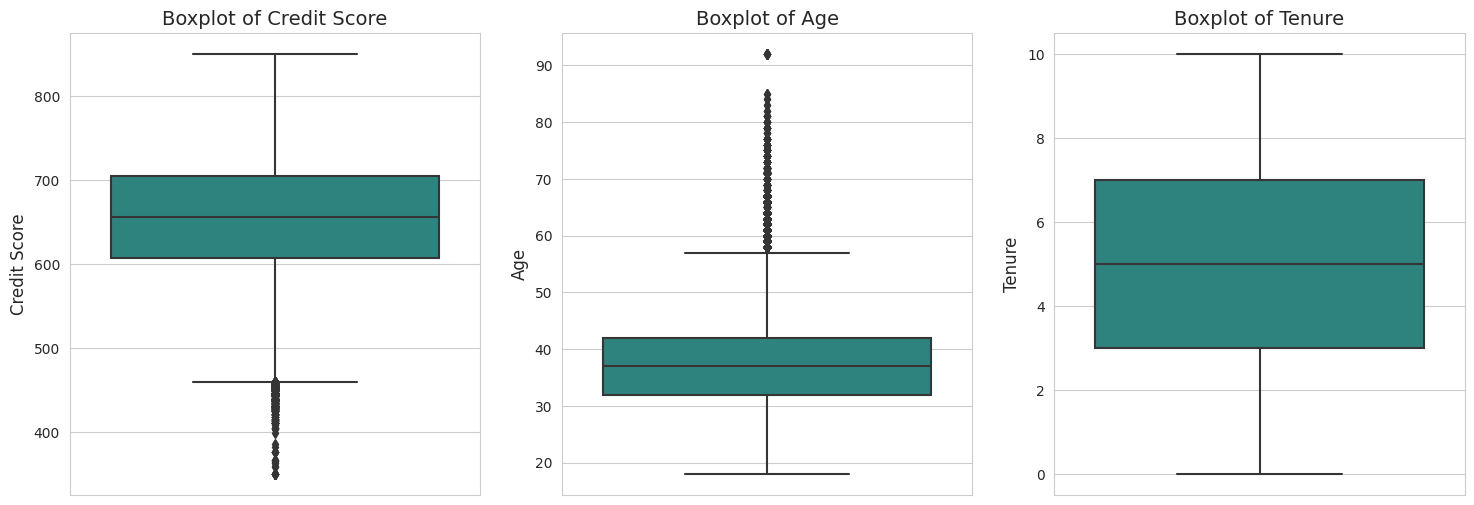

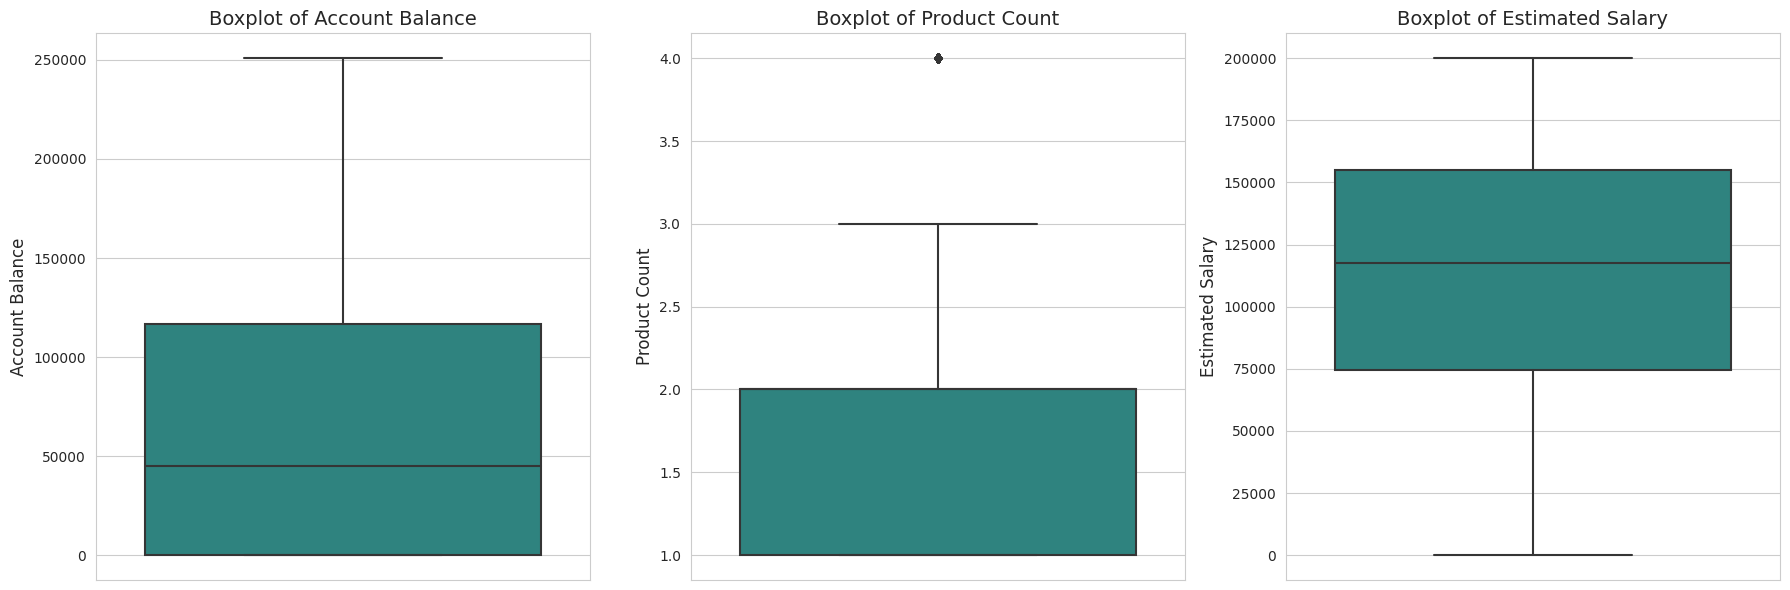

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=train_copy, y="credit_score", palette='viridis')
axes[0].set_title("Boxplot of Credit Score", fontsize=14)
axes[0].set_ylabel("Credit Score", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[1], data=train_copy, y="age", palette='viridis')
axes[1].set_title("Boxplot of Age", fontsize=14)
axes[1].set_ylabel("Age", fontsize=12)
axes[1].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[2], data=train_copy, y="tenure", palette='viridis')
axes[2].set_title("Boxplot of Tenure", fontsize=14)
axes[2].set_ylabel("Tenure", fontsize=12)
axes[2].tick_params(axis='y', labelsize=10)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=train_copy, y="acc_balance", palette='viridis')
axes[0].set_title("Boxplot of Account Balance", fontsize=14)
axes[0].set_ylabel("Account Balance", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[1], data=train_copy, y="prod_count", palette='viridis')
axes[1].set_title("Boxplot of Product Count", fontsize=14)
axes[1].set_ylabel("Product Count", fontsize=12)
axes[1].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[2], data=train_copy, y="estimated_salary", palette='viridis')
axes[2].set_title("Boxplot of Estimated Salary", fontsize=14)
axes[2].set_ylabel("Estimated Salary", fontsize=12)
axes[2].tick_params(axis='y', labelsize=10)

plt.tight_layout()


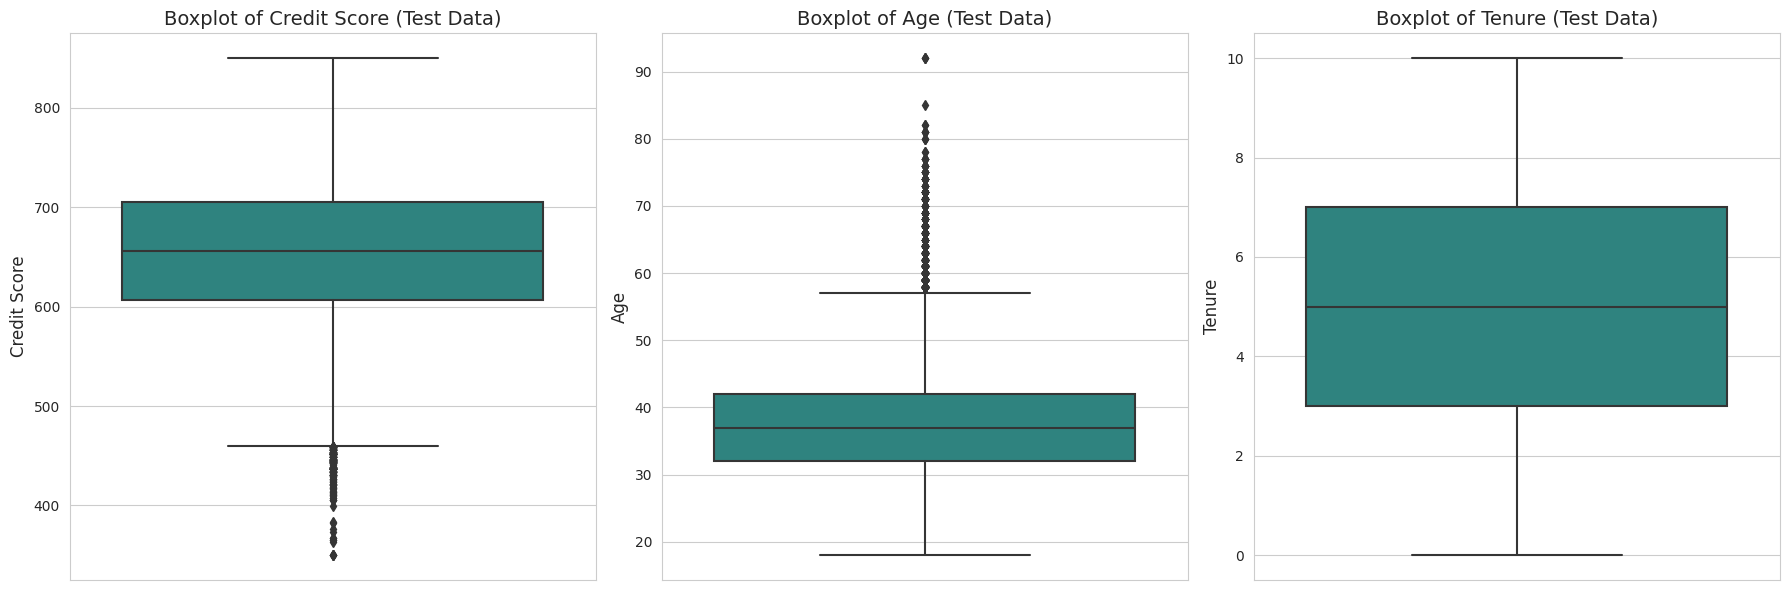

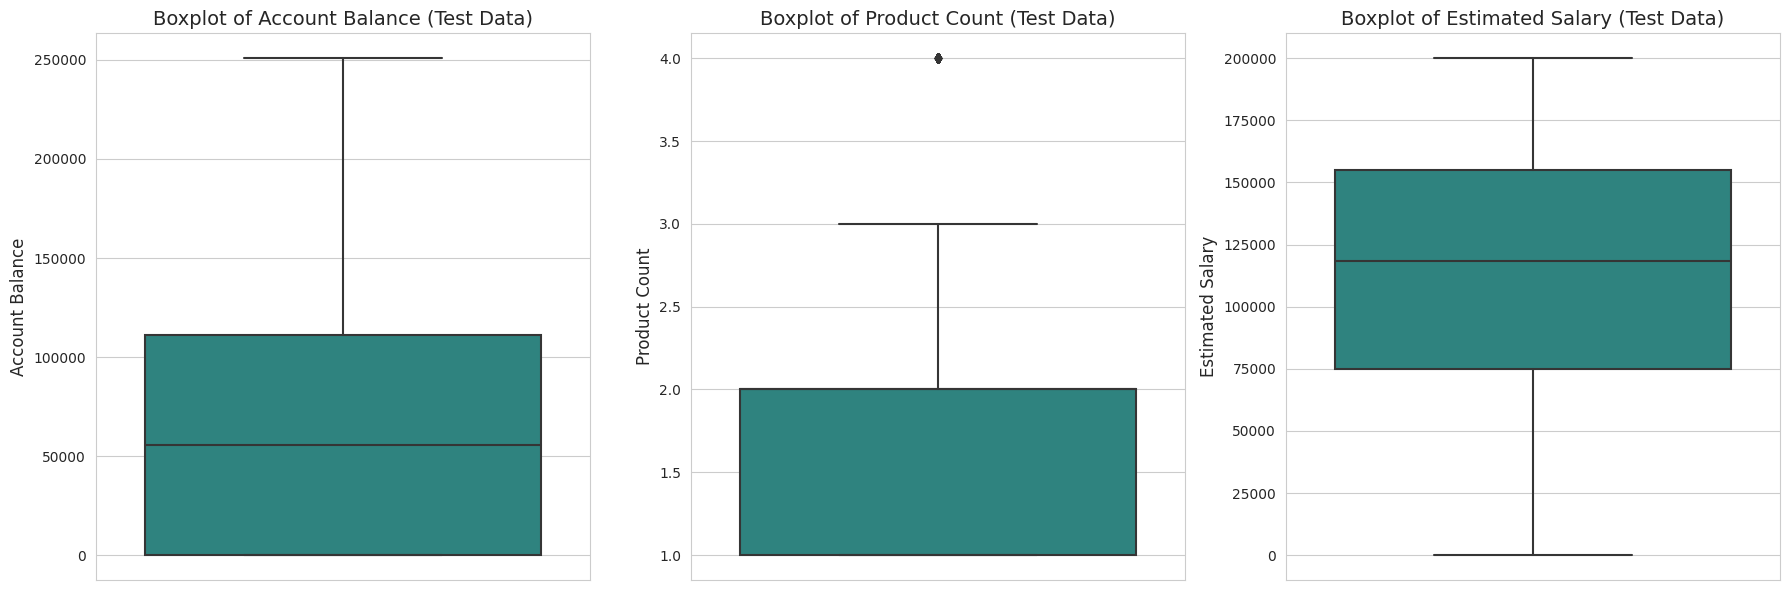

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=test_copy, y="credit_score", palette='viridis')
axes[0].set_title("Boxplot of Credit Score (Test Data)", fontsize=14)
axes[0].set_ylabel("Credit Score", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[1], data=test_copy, y="age", palette='viridis')
axes[1].set_title("Boxplot of Age (Test Data)", fontsize=14)
axes[1].set_ylabel("Age", fontsize=12)
axes[1].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[2], data=test_copy, y="tenure", palette='viridis')
axes[2].set_title("Boxplot of Tenure (Test Data)", fontsize=14)
axes[2].set_ylabel("Tenure", fontsize=12)
axes[2].tick_params(axis='y', labelsize=10)

plt.tight_layout()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=test_copy, y="acc_balance", palette='viridis')
axes[0].set_title("Boxplot of Account Balance (Test Data)", fontsize=14)
axes[0].set_ylabel("Account Balance", fontsize=12)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[1], data=test_copy, y="prod_count", palette='viridis')
axes[1].set_title("Boxplot of Product Count (Test Data)", fontsize=14)
axes[1].set_ylabel("Product Count", fontsize=12)
axes[1].tick_params(axis='y', labelsize=10)

sns.boxplot(ax=axes[2], data=test_copy, y="estimated_salary", palette='viridis')
axes[2].set_title("Boxplot of Estimated Salary (Test Data)", fontsize=14)
axes[2].set_ylabel("Estimated Salary", fontsize=12)
axes[2].tick_params(axis='y', labelsize=10)

plt.tight_layout()

In [72]:
for col in ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'estimated_salary']:
    q1 = train_copy[col].quantile(0.25)
    q3 = train_copy[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_df = train_copy[(train_copy[col] < lower) | (train_copy[col] > upper)]
    print(f'No of outliers in {col}: ', outliers_df.shape[0])

No of outliers in credit_score:  604
No of outliers in age:  3411
No of outliers in tenure:  0
No of outliers in acc_balance:  0
No of outliers in prod_count:  263
No of outliers in estimated_salary:  0


I used box plots to visualize potential outliers in the numerical columns for both my training and test datasets. I also quantified the number of outliers for each numerical column in the training data using the Interquartile Range (IQR) method. I chose to retain these outliers in my dataset because I believe they might represent genuine, albeit extreme, customer behaviors or valid data points. Removing them could potentially lead to a loss of valuable information or negatively affect the model's ability to generalize to unseen data

# 6. Present at least three visualizations and provide insights for the same (10)
At least three visualizations on the data is presented 

## 1. Country vs Exit Status

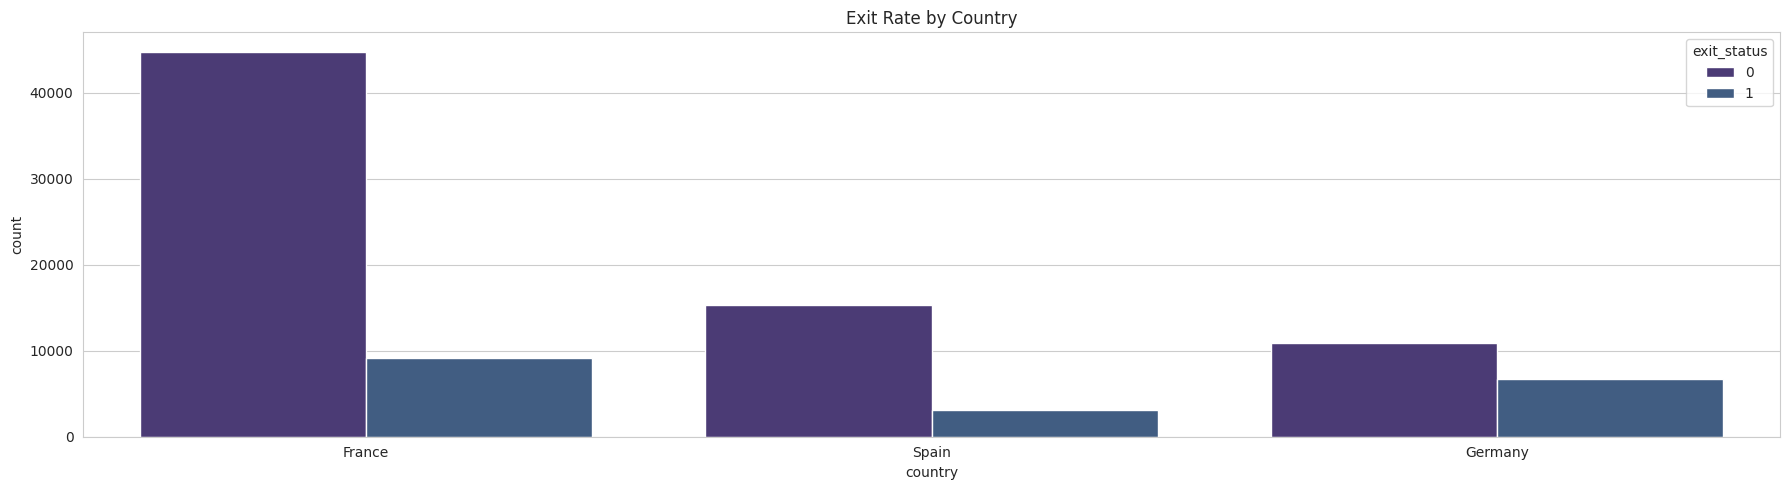

In [73]:
plt.figure(figsize=(18, 5))
sns.countplot(data=train_copy, x="country", hue="exit_status")
plt.title("Exit Rate by Country")
plt.tight_layout()
plt.show()

## 2. Age vs Exit Status

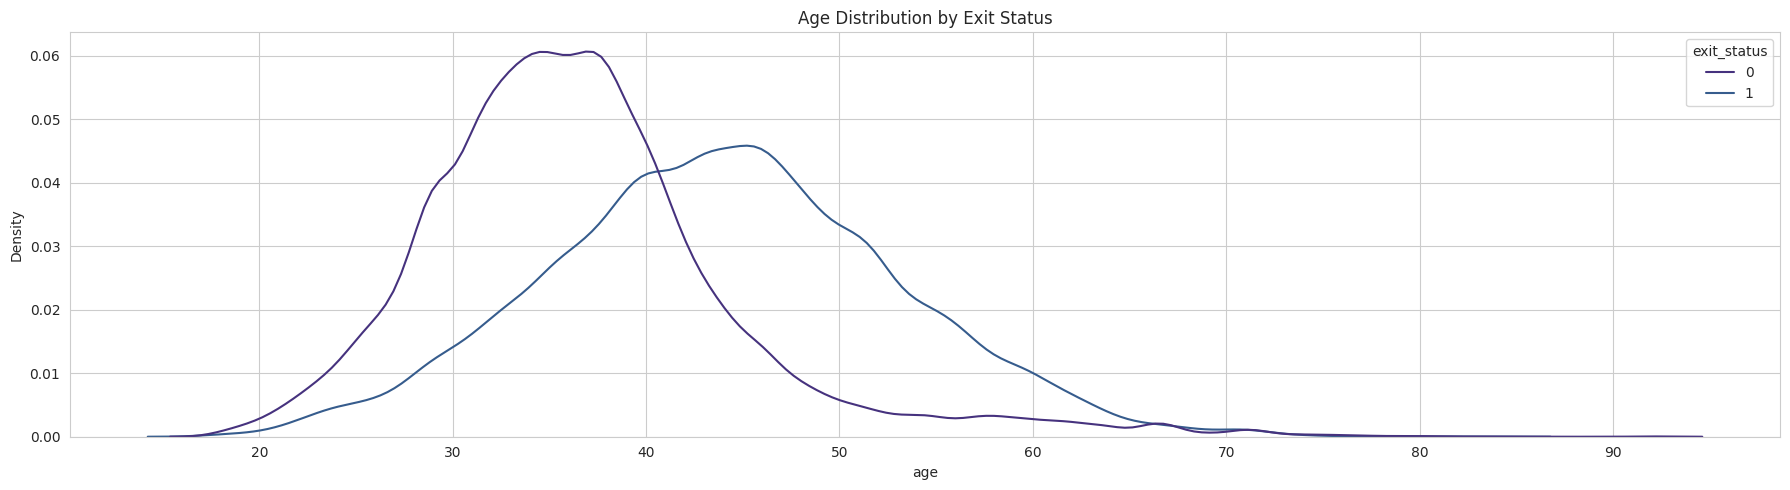

In [74]:
plt.figure(figsize=(18, 5))
sns.kdeplot(data=train_copy, x="age", hue="exit_status", common_norm=False)
plt.title("Age Distribution by Exit Status")
plt.tight_layout()
plt.show()

## 3. Product Count vs Exit Rate

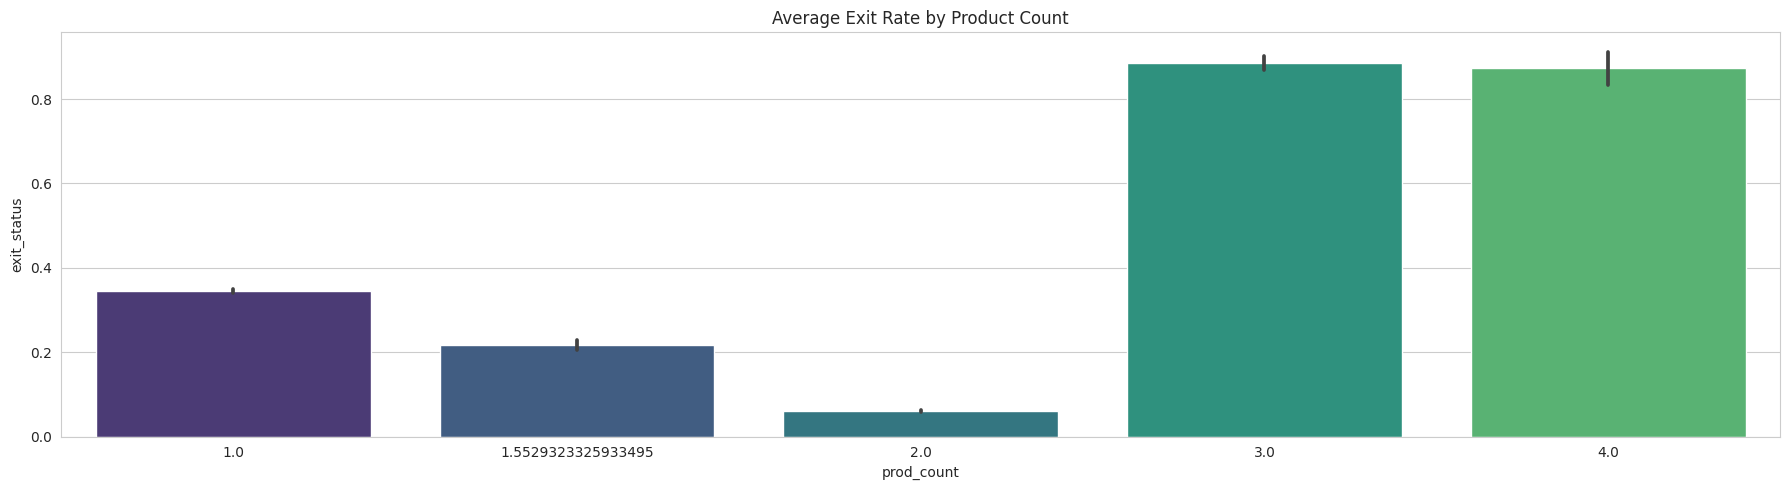

In [75]:
plt.figure(figsize=(18, 5))
sns.barplot(data=train_copy, x="prod_count", y="exit_status")
plt.title("Average Exit Rate by Product Count")
plt.tight_layout()
plt.show()

I created three distinct visualizations to gain insights into the data:

* Exit Rate by Country: This bar plot helped me understand how the customer churn (exit status) varied across different countries, potentially highlighting regions with higher churn rates.

* Age Distribution by Exit Status: The Kernel Density Estimate (KDE) plot allowed me to examine the age distribution of customers who exited versus those who remained, indicating if certain age groups were more prone to churn.

* Average Exit Rate by Product Count: This bar plot showed me the average churn rate based on the number of products a customer held, providing insights into whether customers with fewer or more products were more likely to leave.

# 7. Scale Numerical features and Encode Categorical features (10)
Explanation for scaling (or not scaling) and encoding (or not encoding) is provided

In [76]:
X = train_copy.drop(columns=["exit_status"])
y = train_copy["exit_status"]

In [77]:
ct1 = ColumnTransformer([
    ('scaleing', StandardScaler(),["credit_score", "age", "tenure", "acc_balance", "prod_count", "estimated_salary"] ),
    ('encoding', OneHotEncoder(sparse = False), ["gender", "country"]),
    ('missing_indicator', 'passthrough', ['credit_score_missing_indicator', 'country_missing_indicator', 'acc_balance_missing_indicator', 'prod_count_missing_indicator'])
], remainder = 'passthrough', verbose_feature_names_out=False).set_output(transform = 'pandas')

In [78]:
X = ct1.fit_transform(X)
test_copy = ct1.transform(test_copy)

In [79]:
X

,credit_score,age,tenure,acc_balance,prod_count,estimated_salary,gender_Female,gender_Male,country_France,country_Germany,country_Spain,credit_score_missing_indicator,country_missing_indicator,acc_balance_missing_indicator,prod_count_missing_indicator,has_card,is_active
0,-1.288983,-1.142754,-1.432204,1.570220,-1.037369,-0.889135,0.0,1.0,1.0,0.0,0.0,0.0,False,0.0,0.0,1.0,1.0
1,0.495736,-0.126440,0.706944,0.980890,0.838860,1.398003,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0
2,-0.945259,0.776950,1.063469,-0.000030,0.838860,1.150584,1.0,0.0,1.0,0.0,0.0,0.0,True,1.0,0.0,1.0,1.0
3,-0.892379,-1.481525,-1.788729,1.837531,-1.037369,1.073895,0.0,1.0,0.0,0.0,1.0,0.0,False,0.0,0.0,1.0,1.0
4,0.588277,0.099407,-1.075680,-0.921202,0.838860,-0.593164,0.0,1.0,1.0,0.0,0.0,0.0,False,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,-2.663878,-0.239364,1.776518,1.668051,2.715088,-0.826533,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0
89996,0.284214,-0.803982,1.063469,0.898961,0.838860,-1.209223,0.0,1.0,0.0,1.0,0.0,0.0,False,0.0,0.0,0.0,1.0
89997,-1.672367,-0.803982,-1.432204,-0.000030,-1.037369,-2.184659,0.0,1.0,1.0,0.0,0.0,0.0,False,1.0,0.0,1.0,0.0
89998,1.143523,-1.142754,1.063469,1.587456,0.838860,1.120323,1.0,0.0,0.0,1.0,0.0,0.0,False,0.0,0.0,0.0,0.0


I scaled my numerical features (`credit_score`, `age`, `tenure`, `acc_balance`, `prod_count`, `estimated_salary`) using `StandardScaler`. This step is crucial for standardizing the range of these variables, which prevents features with larger numerical values from disproportionately influencing the model. For categorical features (`gender`, `country`), I applied `OneHotEncoder` to convert them into a numerical format that my machine learning models could process. I also ensured that the missing indicator columns I created earlier were retained using `remainder='passthrough'`.

# 8. Model Building (at least 7) (20)
7 different types of models are trained on the data

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model_metric = {}
fitted_model = {}
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "perceptron": Perceptron(random_state=42),
    "knn_classifier": KNeighborsClassifier(n_neighbors=3),
}

In [82]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    f1 = f1_score(y_valid, preds)
    results[name] = f1
    print(f"{name} Accuracy:\n {f1:.4f}", "\n\n")

Logistic Regression Accuracy:
 0.4945 


Decision Tree Accuracy:
 0.5247 


Random Forest Accuracy:
 0.6106 


Gradient Boosting Accuracy:
 0.6297 


AdaBoost Accuracy:
 0.6146 


perceptron Accuracy:
 0.5386 


knn_classifier Accuracy:
 0.5673 




I trained a total of seven different machine learning models to predict customer churn: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, Perceptron, and K-Nearest Neighbors. This comprehensive approach allowed me to explore various algorithmic strengths. I used the F1-score as my primary evaluation metric, which is particularly useful for assessing performance on imbalanced datasets, common in churn prediction.

# 9. Hyperparameter Tuning on any 3 of the models (10)
Hyperparameter tuning is done on 3 of the models

In [83]:
param_grids = {
    "Decision Tree": {"max_depth": [3, 5, 10, None],"criterion": ["gini", "entropy"]},
    "Random Forest": {"n_estimators": [50, 100],"max_depth": [5, 10, None]},
    "Gradient Boosting": {"learning_rate": [0.01, 0.1],"n_estimators": [100, 200]}
}

In [84]:
best_models = {}
for name, params in param_grids.items():
    print(f"\nTuning {name}")
    clf = models[name]
    gs = GridSearchCV(clf, params, cv=3, scoring="accuracy")
    gs.fit(X_train, y_train)
    print("Best Params:", gs.best_params_)
    print("Best Score:", gs.best_score_)
    best_models[name] = gs.best_estimator_


Tuning Decision Tree
Best Params: {'criterion': 'entropy', 'max_depth': 5}
Best Score: 0.8516995705569307

Tuning Random Forest
Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.8581171991760218

Tuning Gradient Boosting
Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.8601314046662161


I performed hyperparameter tuning on three of my models: Decision Tree, Random Forest, and Gradient Boosting, utilizing `GridSearchCV`. This systematic process allowed me to search for the optimal combination of hyperparameters for each model, aiming to maximize their performance on the training data.

# 10. Comparison of model performances (10)
Performance of the models on validation set is compared

In [85]:
print("\n📊 Final Model Comparison:")
for name in results:
    print(f"{name:20s}: {results[name]:.4f}")


📊 Final Model Comparison:
Logistic Regression : 0.4945
Decision Tree       : 0.5247
Random Forest       : 0.6106
Gradient Boosting   : 0.6297
AdaBoost            : 0.6146
perceptron          : 0.5386
knn_classifier      : 0.5673


In [86]:
final_model = best_models["Gradient Boosting"]
final_model.fit(X, y)
predictions = final_model.predict(test_copy)

In [87]:
predictions

array([0, 1, 0, ..., 0, 0, 1])

Finally, I printed a clear comparison of the F1-scores for all the models I trained on the validation set. This step was critical in evaluating which model performed best, ultimately guiding my decision to select the Gradient Boosting Classifier (after its tuning) as the final model for generating predictions

# Submission

In [88]:
test = test.reset_index()
submission = pd.DataFrame({"id": test["id"], "exit_status": predictions})
submission.to_csv("submission.csv", index=False)

In [89]:
submission

,id,exit_status
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
29995,29995,0
29996,29996,1
29997,29997,0
29998,29998,0
